<a href="https://www.kaggle.com/code/leekahwin/text-analytic-n-gram-feature-extraction?scriptVersionId=105388212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:210%;
            font-family:sans-serif;
            letter-spacing:0.5px;
            padding:10px;
            color:white;
            border-style: solid;
            border-color: black;
            text-align:center;">
<b>
 ⚕️🔬 Text Analytic - N-Gram Feature Extraction 📝


In this notebook, n-gram will be used for feature extraction, which is the first NLP approach that introduced by Markov in 1913 [1]. An N-gram is an N-character slice of a longer string. The intuition of the n-gram model is that instead of computing a prediction based on entire corpus, one can approximate the prediction by only contiguous slices sequence of n words [2]. 

To explain feature extraction using n-gram with a demonstration of the sentence, “The student is alone happily”. The number of n-gram features can be calculated by k-n+1, where k is the number of words. The result is a bag-of-n-grams model [3]. Table below shows the demonstration of different n-gram feature representations.

Notebook Author: <br>
Morris Lee (11/9/2022)

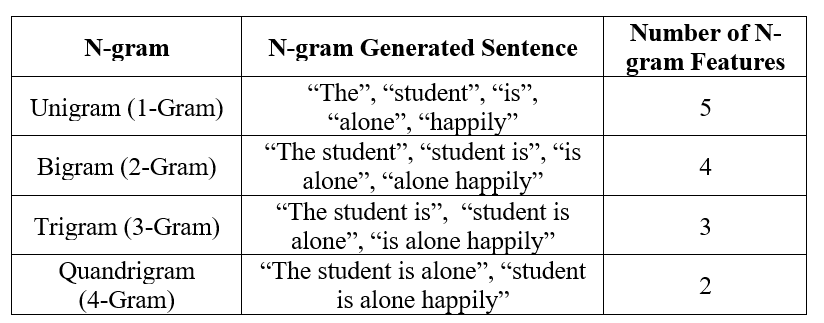


#### [1.0 Import Functions and EDA](#1.0)
* [1.1 Import Functions](#1.1)
* [1.2 Word Counts of Each Medical Specialty](#1.2)
* [1.3 Sample Size of Each Medical Specialty](#1.3)
* [1.4 General Cleaning](#1.4)

#### [2.0 Text Normalisation](#2.0)
* [2.1 Lower Case](#2.1)
* [2.2 Remove Punctuation and Numbers](#2.2)
* [2.3 Tokenisation](#2.3)
* [2.4 Stemming ](#2.4)
* [2.5 Stop Words Removal ](#2.5)
* [2.6 Visualising Word Clouds](#2.6)

#### [3.0 Text N-Gram Feature Extraction](#3.0)
* [3.1 Extract 5 Types of N-Gram](#3.1)
* [3.2 Dimension of Each Feature Vector](#3.2)

#### [4.0 References](#4.0)


# <b>1.0 <span style='color:red'>|</span> Import Functions and EDA </b> <a class="anchor" id="1.1"></a>

At first, let's import the dataset from my directory. I have also set maximum column width in order to read the transcription. If not set, the transcrip will only show partially due to there are many words for each transcription record.

# <b>1.1 <span style='color:red'>|</span> Import Functions </b> <a class="anchor" id="1.1"></a>

In [1]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib
import matplotlib.pyplot as plt
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer


pd.set_option('display.max_colwidth', 255)
df =pd.read_csv('/kaggle/input/medicaltranscriptions/mtsamples.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

def shape(df,df_name):
    print(f'STATUS: Dimension of "{df_name}" = {df.shape}')
df.head(3)

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female presents with complaint of allergies. She used to have allergies when she lived in Seattle but she thinks they are worse here. In the past, she has tried Claritin, and Zyrtec. Both worked for short time b...","allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,"
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor. He exercises three times a week at home and does cardio. He has difficulty walking two b...","bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic, band, loss, diets, overweight, lost"
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC today. He is a very pleasant gentleman who is 42 years old, 344 pounds. He is 5'9"". He has a BMI of 51. He has been overweight for ten years since the age of 33, at his highest he was 358 pounds, at hi...","bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, gastric, bypass, heart, pounds, weight,"


# <b>1.2 <span style='color:red'>|</span> Word Counts of Each Medical Specialty </b> <a class="anchor" id="1.2"></a>

To query the data, I would like to know how is the size of the dataset and also to rank null values in descending order

In [2]:
medical_specialty_list = [] ; word_count_list =[]
for medical_specialty in df['medical_specialty'].unique():
    df_filter = df.loc[(df['medical_specialty'] == medical_specialty)]
    word_count_temp = df_filter['transcription'].str.split().str.len().sum()
    medical_specialty_list.append(medical_specialty)
    word_count_list.append(word_count_temp)
word_count_df = pd.DataFrame({'Medical Specialty':medical_specialty_list, 'Word Count':word_count_list})
word_count_df['Word Count'] = word_count_df['Word Count'].astype('int')
word_count_df = word_count_df.sort_values('Word Count', ascending=False)
word_count_df.reset_index(drop=True)

,Medical Specialty,Word Count
0,Surgery,526754
1,Consult - History and Phy.,287961
2,Orthopedic,198489
3,Cardiovascular / Pulmonary,160867
4,General Medicine,120978
5,Neurology,110677
6,Gastroenterology,80347
7,Radiology,74969
8,Obstetrics / Gynecology,72589
9,Urology,63419


The word count of all transcription is: 2311419


<BarContainer object of 40 artists>

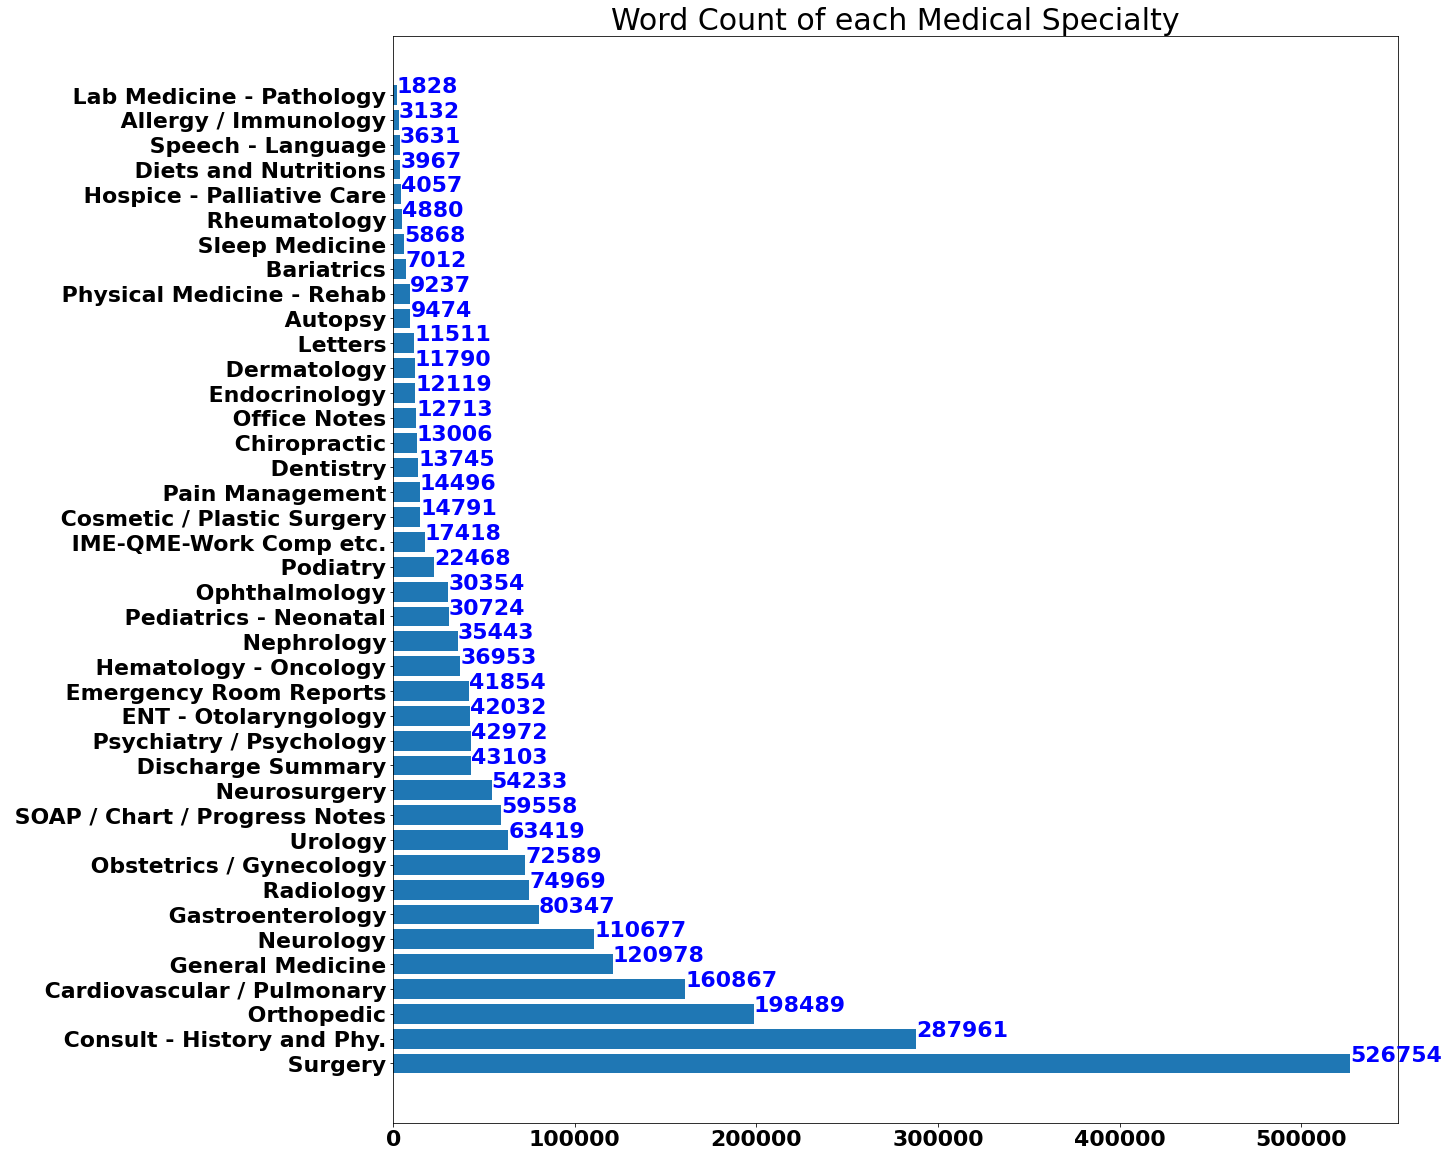

In [3]:
font = {'family' : 'Tahoma',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
def bar_plot(labels, value_counts, title):
    
    f, ax = plt.subplots(figsize=(18,20))
    ax.set_title(F'{title}' , fontsize=30)
    for i, v in enumerate(value_counts):
        v = round(v,1)
        ax.text(v + 0.1, i + 0.1, str(v), color='blue')
    return plt.barh(labels, value_counts)

total_word_count = df['transcription'].str.split().str.len().sum()
print(f'The word count of all transcription is: {int(total_word_count)}')

bar_plot(word_count_df['Medical Specialty'].values, word_count_df['Word Count'].values,"Word Count of each Medical Specialty")

# <b>1.3 <span style='color:red'>|</span> Sample Size of Each Medical Specialty </b> <a class="anchor" id="1.3"></a>

There are 40 target labels


<BarContainer object of 40 artists>

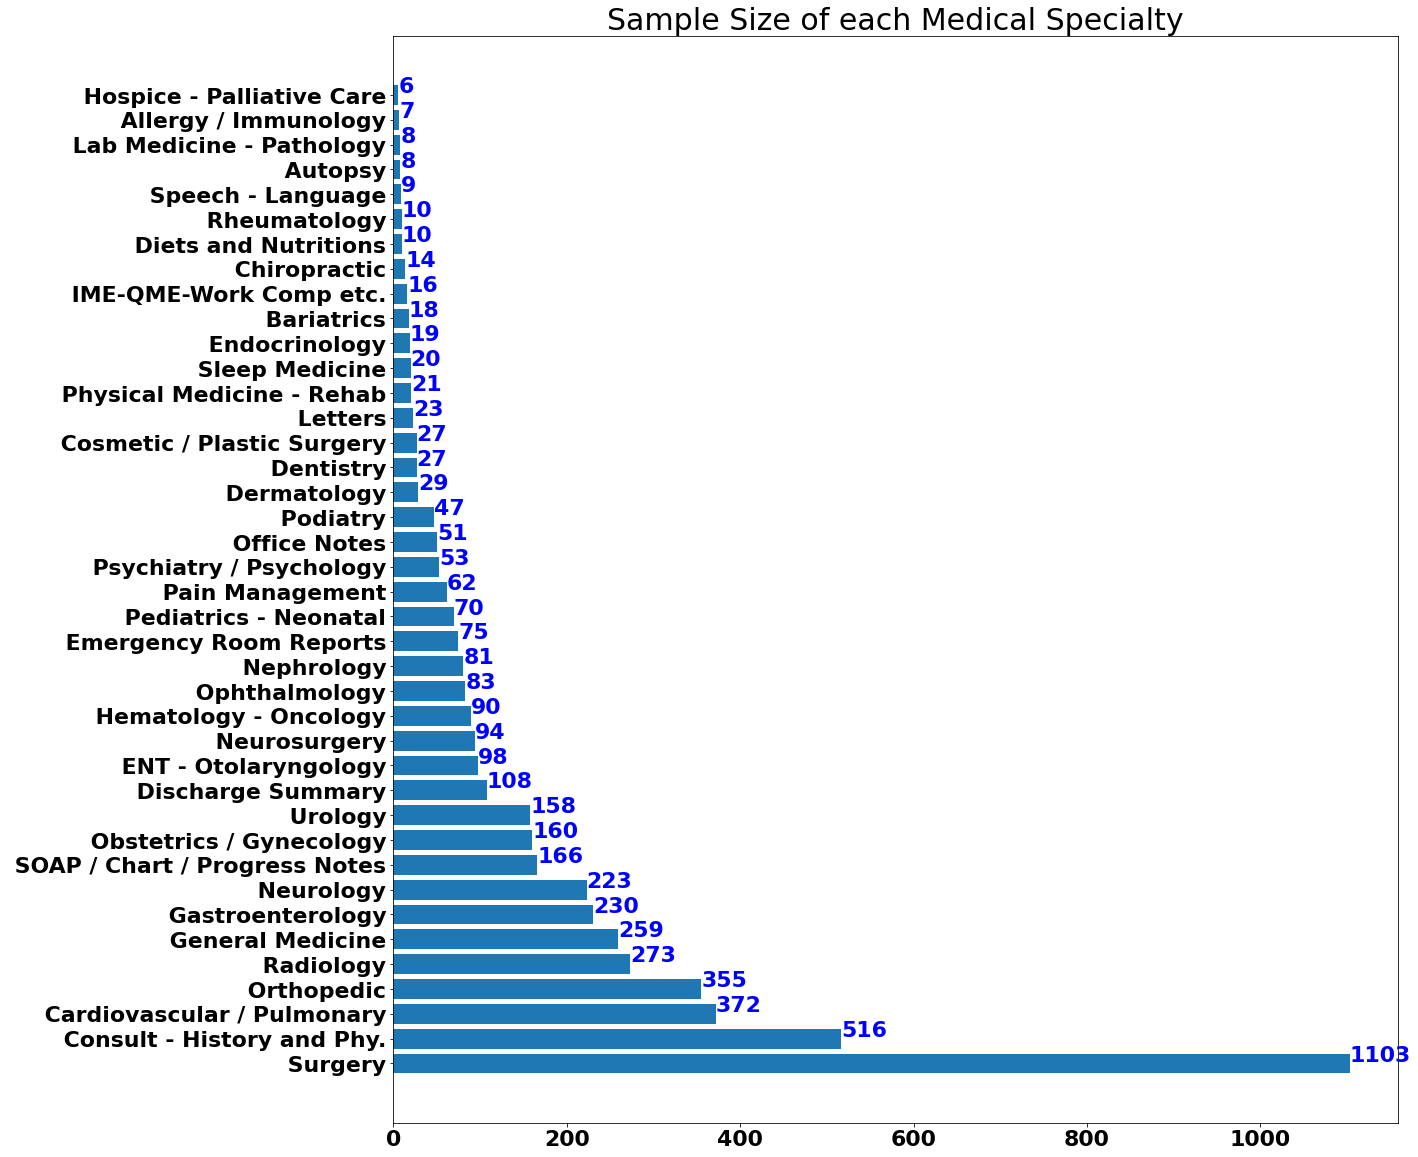

In [4]:
# function to flatten one list
def flat_list(unflat_list):
    flatted = [item for sublist in unflat_list for item in sublist]
    return flatted

# to convert value counts into list format
value_counts =df[['medical_specialty']].value_counts().rename_axis('medical_specialty').reset_index(name='value_counts')
labels = flat_list(value_counts[['medical_specialty']].values.tolist())
value_counts = flat_list(value_counts[['value_counts']].values.tolist())

# To count how many labels in the dataset`
print(f"There are {len(labels)} target labels")

bar_plot(labels,value_counts,"Sample Size of each Medical Specialty")

# <b>1.4 <span style='color:red'>|</span> General Cleaning </b> <a class="anchor" id="1.4"></a>

In [5]:
# to print data shape
print(f'data shape is: {df.shape}')

# to identify the null values by descending order
df.isnull().sum().sort_values(ascending = False)

data shape is: (4999, 5)


keywords             1068
transcription          33
description             0
medical_specialty       0
sample_name             0
dtype: int64

One important detail is that I found out there are 2 rows containing no transcription. They should be removed as transcription is our only predictors in this text classification task.

In [6]:
# to remove transcription rows that is empty
df = df[df['transcription'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4966 non-null   object
 1   medical_specialty  4966 non-null   object
 2   sample_name        4966 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3898 non-null   object
dtypes: object(5)
memory usage: 232.8+ KB


After dropping the null values, there are no null values for the transcription attribute. Now it has decreased slightly to 4966 observations in this dataset.

In [7]:
# drop redundant columns
df =df.drop(['description','sample_name','keywords'], axis=1)
df.head(2)

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female presents with complaint of allergies. She used to have allergies when she lived in Seattle but she thinks they are worse here. In the past, she has tried Claritin, and Zyrtec. Both worked for short time b..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor. He exercises three times a week at home and does cardio. He has difficulty walking two b..."


The target labels (or the topic) is the 'medical_specialty' attribute. Now, let's identify how is the value counts of the target labels, and as well visualise it in a bar chart. In order to visualise in matplotlib, function of flattening list is defined in order to put the target value counts into the matplotlib function.

# <b>2.0 <span style='color:red'>|</span> Text Normalisation </b> <a class="anchor" id="2.0"></a>

Data normalisation will be conducted for the trascription. One of the reasons is to convert the transcript into standard format, which important for data extraction later. In this data normalisation task, following task will be executed, which are:
1. Lowe Case
2. Removing punctuation and numbers
3. Tokenisation of the transcription
4. Stemming
5. Remove Stop Words

# <b>2.1 <span style='color:red'>|</span> Lower Case </b> <a class="anchor" id="2.1"></a>

In [8]:
# To convert transcription into lowercase
def lower(df, attribute):
    df.loc[:,attribute] = df[attribute].apply(lambda x : str.lower(x))
    return df
df = lower(df,'transcription')
df.head(3)

,medical_specialty,transcription
0,Allergy / Immunology,"subjective:, this 23-year-old white female presents with complaint of allergies. she used to have allergies when she lived in seattle but she thinks they are worse here. in the past, she has tried claritin, and zyrtec. both worked for short time b..."
1,Bariatrics,"past medical history:, he has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor. he exercises three times a week at home and does cardio. he has difficulty walking two b..."
2,Bariatrics,"history of present illness: , i have seen abc today. he is a very pleasant gentleman who is 42 years old, 344 pounds. he is 5'9"". he has a bmi of 51. he has been overweight for ten years since the age of 33, at his highest he was 358 pounds, at hi..."


# <b>2.2 <span style='color:red'>|</span> Remove Punctuation and Numbers </b> <a class="anchor" id="2.2"></a>

In [9]:
# To remove transcription punctuation and numbers

warnings.filterwarnings('ignore')
def remove_punc_num(df, attribute):
    df.loc[:,attribute] = df[attribute].apply(lambda x : " ".join(re.findall('[\w]+',x)))
    df[attribute] = df[attribute].str.replace('\d+', '')
    return df
df =remove_punc_num(df, 'transcription')
df_no_punc =df.copy()
df.head(3)

,medical_specialty,transcription
0,Allergy / Immunology,subjective this year old white female presents with complaint of allergies she used to have allergies when she lived in seattle but she thinks they are worse here in the past she has tried claritin and zyrtec both worked for short time but then seeme...
1,Bariatrics,past medical history he has difficulty climbing stairs difficulty with airline seats tying shoes used to public seating and lifting objects off the floor he exercises three times a week at home and does cardio he has difficulty walking two blocks or f...
2,Bariatrics,history of present illness i have seen abc today he is a very pleasant gentleman who is years old pounds he is he has a bmi of he has been overweight for ten years since the age of at his highest he was pounds at his lowest he is pursuing surg...


# <b>2.3 <span style='color:red'>|</span> Tokenisation </b> <a class="anchor" id="2.3"></a>


In [10]:
# to tokenise transcription

# import nltk
tk =WhitespaceTokenizer()
def tokenise(df, attribute):
    df['tokenised'] = df.apply(lambda row: tk.tokenize(str(row[attribute])), axis=1)
    return df
df =tokenise(df, 'transcription')
df_experiment =df.copy()
df.head(3)

,medical_specialty,transcription,tokenised
0,Allergy / Immunology,subjective this year old white female presents with complaint of allergies she used to have allergies when she lived in seattle but she thinks they are worse here in the past she has tried claritin and zyrtec both worked for short time but then seeme...,"[subjective, this, year, old, white, female, presents, with, complaint, of, allergies, she, used, to, have, allergies, when, she, lived, in, seattle, but, she, thinks, they, are, worse, here, in, the, past, she, has, tried, claritin, and, zyrtec, both..."
1,Bariatrics,past medical history he has difficulty climbing stairs difficulty with airline seats tying shoes used to public seating and lifting objects off the floor he exercises three times a week at home and does cardio he has difficulty walking two blocks or f...,"[past, medical, history, he, has, difficulty, climbing, stairs, difficulty, with, airline, seats, tying, shoes, used, to, public, seating, and, lifting, objects, off, the, floor, he, exercises, three, times, a, week, at, home, and, does, cardio, he, h..."
2,Bariatrics,history of present illness i have seen abc today he is a very pleasant gentleman who is years old pounds he is he has a bmi of he has been overweight for ten years since the age of at his highest he was pounds at his lowest he is pursuing surg...,"[history, of, present, illness, i, have, seen, abc, today, he, is, a, very, pleasant, gentleman, who, is, years, old, pounds, he, is, he, has, a, bmi, of, he, has, been, overweight, for, ten, years, since, the, age, of, at, his, highest, he, was, poun..."


# <b>2.4 <span style='color:red'>|</span> Stemming </b> <a class="anchor" id="2.4"></a>


In [11]:
from nltk.stem.snowball import SnowballStemmer
def stemming(df, attribute):
    # Use English stemmer.
    stemmer = SnowballStemmer("english")
    df['stemmed'] = df[attribute].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
    return df
df =stemming(df_experiment, 'tokenised')
df.head(2)

,medical_specialty,transcription,tokenised,stemmed
0,Allergy / Immunology,subjective this year old white female presents with complaint of allergies she used to have allergies when she lived in seattle but she thinks they are worse here in the past she has tried claritin and zyrtec both worked for short time but then seeme...,"[subjective, this, year, old, white, female, presents, with, complaint, of, allergies, she, used, to, have, allergies, when, she, lived, in, seattle, but, she, thinks, they, are, worse, here, in, the, past, she, has, tried, claritin, and, zyrtec, both...","[subject, this, year, old, white, femal, present, with, complaint, of, allergi, she, use, to, have, allergi, when, she, live, in, seattl, but, she, think, they, are, wors, here, in, the, past, she, has, tri, claritin, and, zyrtec, both, work, for, sho..."
1,Bariatrics,past medical history he has difficulty climbing stairs difficulty with airline seats tying shoes used to public seating and lifting objects off the floor he exercises three times a week at home and does cardio he has difficulty walking two blocks or f...,"[past, medical, history, he, has, difficulty, climbing, stairs, difficulty, with, airline, seats, tying, shoes, used, to, public, seating, and, lifting, objects, off, the, floor, he, exercises, three, times, a, week, at, home, and, does, cardio, he, h...","[past, medic, histori, he, has, difficulti, climb, stair, difficulti, with, airlin, seat, tie, shoe, use, to, public, seat, and, lift, object, off, the, floor, he, exercis, three, time, a, week, at, home, and, doe, cardio, he, has, difficulti, walk, t..."


# <b>2.5 <span style='color:red'>|</span> Stop Words Removal </b> <a class="anchor" id="2.5"></a>


Removing stop words from the feature space, otherwise it will affect the classifier performance as the collection frequency is often high

In [12]:
# Showing the list of the English stop words, it has a number of 179 stop words in this list

stop = stopwords.words('english')
print(f"There are {len(stop)} stop words \n")
print(stop)

There are 179 stop words 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'ow

In [13]:
# Removing stop words
def remove_stop_words(df, attribute):
    stop = stopwords.words('english')
    df['stemmed_without_stop'] = df[attribute].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))
    return df
df = remove_stop_words(df, 'stemmed')
df.head(2)

,medical_specialty,transcription,tokenised,stemmed,stemmed_without_stop
0,Allergy / Immunology,subjective this year old white female presents with complaint of allergies she used to have allergies when she lived in seattle but she thinks they are worse here in the past she has tried claritin and zyrtec both worked for short time but then seeme...,"[subjective, this, year, old, white, female, presents, with, complaint, of, allergies, she, used, to, have, allergies, when, she, lived, in, seattle, but, she, thinks, they, are, worse, here, in, the, past, she, has, tried, claritin, and, zyrtec, both...","[subject, this, year, old, white, femal, present, with, complaint, of, allergi, she, use, to, have, allergi, when, she, live, in, seattl, but, she, think, they, are, wors, here, in, the, past, she, has, tri, claritin, and, zyrtec, both, work, for, sho...",subject year old white femal present complaint allergi use allergi live seattl think wors past tri claritin zyrtec work short time seem lose effect use allegra also use last summer began use two week ago doe appear work veri well use counter spray pre...
1,Bariatrics,past medical history he has difficulty climbing stairs difficulty with airline seats tying shoes used to public seating and lifting objects off the floor he exercises three times a week at home and does cardio he has difficulty walking two blocks or f...,"[past, medical, history, he, has, difficulty, climbing, stairs, difficulty, with, airline, seats, tying, shoes, used, to, public, seating, and, lifting, objects, off, the, floor, he, exercises, three, times, a, week, at, home, and, does, cardio, he, h...","[past, medic, histori, he, has, difficulti, climb, stair, difficulti, with, airlin, seat, tie, shoe, use, to, public, seat, and, lift, object, off, the, floor, he, exercis, three, time, a, week, at, home, and, doe, cardio, he, has, difficulti, walk, t...",past medic histori difficulti climb stair difficulti airlin seat tie shoe use public seat lift object floor exercis three time week home doe cardio difficulti walk two block five flight stair difficulti snore muscl joint pain includ knee pain back pai...


After the 5 data normalisation steps, each transcription record is now in a standard format, which is ready for the n-gram features extraction later. Hence, we should use the attribute 'stemmed_withou_stop' as the predictor attribute and drop other redundant attributes, namely 'transcription', 'tokenized_transcription' and 'stemmed'.

In [14]:
df =df.drop(['transcription','stemmed', 'tokenised'], axis=1)
df.head()

,medical_specialty,stemmed_without_stop
0,Allergy / Immunology,subject year old white femal present complaint allergi use allergi live seattl think wors past tri claritin zyrtec work short time seem lose effect use allegra also use last summer began use two week ago doe appear work veri well use counter spray pre...
1,Bariatrics,past medic histori difficulti climb stair difficulti airlin seat tie shoe use public seat lift object floor exercis three time week home doe cardio difficulti walk two block five flight stair difficulti snore muscl joint pain includ knee pain back pai...
2,Bariatrics,histori present ill seen abc today veri pleasant gentleman year old pound bmi overweight ten year sinc age highest pound lowest pursu surgic attempt weight loss feel good get healthi begin exercis want abl exercis play volleybal physic sluggish get ti...
3,Cardiovascular / Pulmonary,mode left atrial enlarg left atrial diamet cm normal size right left ventricl normal lv systol function left ventricular eject fraction normal lv diastol function pericardi effus normal morpholog aortic valv mitral valv tricuspid valv pulmonari valv p...
4,Cardiovascular / Pulmonary,left ventricular caviti size wall thick appear normal wall motion left ventricular systol function appear hyperdynam estim eject fraction near caviti obliter seen also appear increas left ventricular outflow tract gradient mid caviti level consist hyp...


As we can see from the dataframe above, the target column is still in text form. In order to be processed by machine, one should label encode it into numerical format. Hence sklearn preprocessing will be imported in order to label encode the target column, which is as shown below. Let show the word clouds first.

# <b>2.6 <span style='color:red'>|</span> Visualising Word Clouds </b> <a class="anchor" id="2.6"></a>

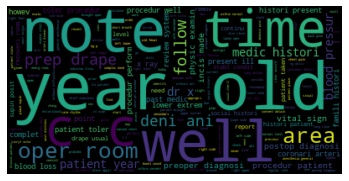

In [15]:
# Transcription for all

def wordcloud(df):
    wordcloud_ent = WordCloud().generate(' '.join(df['stemmed_without_stop']))
    plt.imshow(wordcloud_ent, interpolation='bilinear')
    plt.axis("off")
    return plt.show()
wordcloud(df)

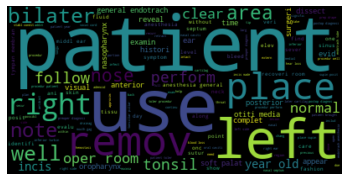

In [16]:
# Transcription for ENT - Otolaryngology
df_ent =df.loc[(df['medical_specialty'] == ' ENT - Otolaryngology')]
wordcloud(df_ent)

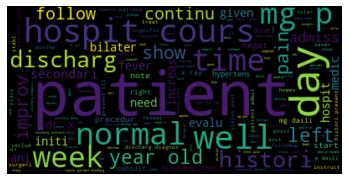

In [17]:
# Transcription for Discharge Summary
df_dc =df.loc[(df['medical_specialty'] == ' Discharge Summary')]
wordcloud(df_dc)

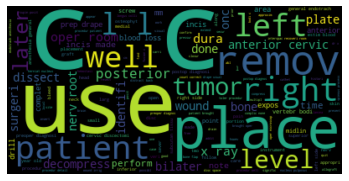

In [18]:
# Transcription for Neurosurgery
df_neu =df.loc[(df['medical_specialty'] == ' Neurosurgery')]
wordcloud(df_neu)

In [19]:
# because the word 'patient' is appeared very often, it is considered as stop words, so remove them
for index, row in df.iterrows():
    row['stemmed_without_stop'] = row['stemmed_without_stop'].replace('use', '')
    row['stemmed_without_stop'] = row['stemmed_without_stop'].replace('patient', '')
    row['stemmed_without_stop'] = row['stemmed_without_stop'].replace('c', '')
    row['stemmed_without_stop'] = row['stemmed_without_stop'].replace('ha', '')
    # because remove a word will leave additional place, so code below strip redundant white space
    row['stemmed_without_stop'] = row['stemmed_without_stop'].replace('  ', ' ')

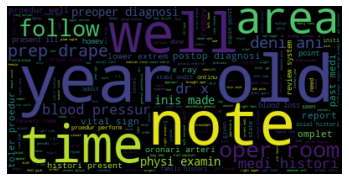

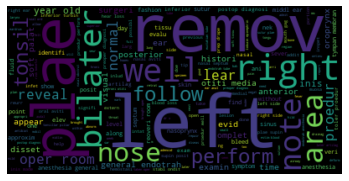

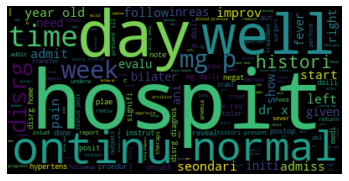

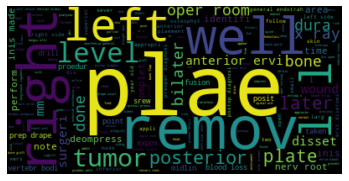

In [20]:
# and then now the word is cleaned, does not has same words that occur many times
df_ent =df.loc[(df['medical_specialty'] == ' ENT - Otolaryngology')]
df_dc =df.loc[(df['medical_specialty'] == ' Discharge Summary')]
df_neu =df.loc[(df['medical_specialty'] == ' Neurosurgery')]
wordcloud(df)
wordcloud(df_ent)
wordcloud(df_dc)
wordcloud(df_neu)

In [21]:
total_word_count_normalised = df['stemmed_without_stop'].str.split().str.len().sum()
print(f'The word count of transcription after normalised is: {int(total_word_count_normalised)}')
print(f'{round((total_word_count - total_word_count_normalised)/total_word_count*100, 2)}% less word')

The word count of transcription after normalised is: 1346130
41.76% less word


In [22]:
def label_encoding(df, attribute):
    le = preprocessing.LabelEncoder()
    df['encoded_target'] = le.fit_transform(df[attribute])
    return df
df = label_encoding(df, 'medical_specialty')
df.tail(2)

,medical_specialty,stemmed_without_stop,encoded_target
4997,Allergy / Immunology,hief omplaint year old male present hildren hospit emerg depart mother asthma mother state wheez ough saw primari medi dotor evalu lini given breath treatment disrg home asthma presrib prednison antibiot told go er got wors vomit abdomin pain peak flo...,0
4998,Allergy / Immunology,histori year old male present today self refer reommend emerg room physiian nephrologist pursu allergi evalu treatment pleas refer rt histori physi well medi reord regard allerg reation treatment ab medi enter detail studi summari aut event perior swe...,0


# <b>3.0 <span style='color:red'>|</span> Text N-Gram Feature Extraction </b> <a class="anchor" id="3.0"></a>

We will use sklearn class 'CountVectoriser' to extract different n-grams features. In order to do so, the transcription should be converted into a list format, rather than a dataframe. For the purpose of converting into a flat list (i.e., there is no inner list), the function of 'flat_list' that defined above is used.

In [23]:
def to_list(df, attribute):
    # Select the normalised transcript column 
    df_transcription = df[[attribute]]
    # To convert the attribute into list format, but it has inner list. So it cannot put into the CountVectoriser
    unflat_list_transcription = df_transcription.values.tolist()
    # Let's use back the function defined above, "flat_list", to flatten the list
    flat_list_transcription = flat_list(unflat_list_transcription)
    return flat_list_transcription
flat_list_transcription = to_list(df, 'stemmed_without_stop')

# <b>3.1 <span style='color:red'>|</span> Extract 5 Types of N-Gram </b> <a class="anchor" id="3.1"></a>


CountVectorizer is used to convert a collection of transcript documents to a matrix of n-gram features. To explain the ngram_range, all values of n such such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams.

In [24]:
n_gram_features ={'unigram':(1,1),'unigram_bigram':(1,2),'bigram':(2,2),\
       'bigram_trigram':(2,3),'trigram':(3,3)}
feature_name=[]
temp=[]
for key, values in n_gram_features.items():
    temp.append(key)
    feature_name.append(key)
temp

['unigram', 'unigram_bigram', 'bigram', 'bigram_trigram', 'trigram']

In [25]:
def generate_n_gram_features(flat_list_transcription):
    temp=[]
    for key, values in n_gram_features.items(): 
        vectorizer = CountVectorizer(ngram_range=values)
        vectorizer.fit(flat_list_transcription)
        temp.append(vectorizer.transform(flat_list_transcription))
    return temp
temp = generate_n_gram_features(flat_list_transcription)

# <b>3.2 <span style='color:red'>|</span> Dimension of Each Feature Vector </b> <a class="anchor" id="3.2"></a>

In [26]:
dataframes = {'unigram':temp[0], 
              'unigram_bigram':temp[1], 
              'bigram':temp[2], 
              'bigram_trigram':temp[3], 
              'trigram':temp[4]}
feature_vector = [] ; feature_vector_shape = []
for key in dataframes:
    feature_vector.append(key)
    feature_vector_shape.append(dataframes[key].shape)

n_gram_df = pd.DataFrame({'N-Gram Feature Vector':feature_vector, 'Data Dimension':feature_vector_shape})
n_gram_df

,N-Gram Feature Vector,Data Dimension
0,unigram,"(4966, 14065)"
1,unigram_bigram,"(4966, 299615)"
2,bigram,"(4966, 285550)"
3,bigram_trigram,"(4966, 759638)"
4,trigram,"(4966, 474088)"


After the feature extraction process, 5 kinds of n-gram features are extracted. It is interesting to notice that when the number of 'n' getting higher (i.e, n=1:unigram, n=2:bigram, n=3:trigram), there is a higer number of columns. This is due to it is getting harder to find similar features that can be stored in similar column when it has a longer connected words as one featuer. If the feature is unique, it will automatically append additional column to store the feaure.

In [27]:
# to retrieve a unigram feature vector
dataframes['unigram']

<4966x14065 sparse matrix of type '<class 'numpy.int64'>'
	with 814023 stored elements in Compressed Sparse Row format>

# <b>4.0 <span style='color:red'>|</span> References </b> <a class="anchor" id="3.2"></a>

[1]	A. Markov, “Example of a statistical investigation of the text of ‘Eugene Onegin’ illustrating the dependence between samples in chain,” Izvistia Imperatorskoi Akademii Nauk (Bulletin de l’Academie Imp ´ eriale ´ des Sciences de St.-Petersbourg), pp. 153–162, 1913.

[2]	D. Jurasfky and J. Martin, An introduction to natural language processing, computational linguistics, and speech recognition., 3rd ed. 2021.

[3]	B. J. Marafino, J. M. Davies, N. S. Bardach, M. L. Dean, and R. A. Dudley, “N-gram support vector machines for scalable procedure and diagnosis classification, with applications to clinical free text data from the intensive care unit,” Journal of the American Medical Informatics Association, vol. 21, no. 5, pp. 871–875, 2014, doi: 10.1136/amiajnl-2014-002694.


Notebook Author: <br>
Morris Lee <br>
11/9/2022